# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# Shape of an traffic sign image.
image_shape = X_train[0].shape

# Number of unique classes/labels in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration visualization code

# Make all necessary inputs
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import pandas as pd
import random
import numpy as np

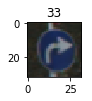

In [4]:
# First, let's look at a simple plot of a random image
index = random.randint(0, len(X_train)-1)
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
plt.title(y_train[index])
plt.savefig('./example_images/writeup1.png',bbox_inches='tight')

Good, but I don't like those numbers, so let's create a dictionary for mapping the real names:

In [5]:
# load signnames.csv in pandas df and create dict
signnames = pd.read_csv('signnames.csv')
signnames.set_index('ClassId', inplace=True)
signnames_dict = signnames.to_dict()

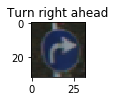

In [6]:
# now let's visualize the same picture, but this time include the name rather than number
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
plt.title(signnames_dict['SignName'][y_train[index]])
plt.savefig('./example_images/writeup2.png',bbox_inches='tight')

In [7]:
# Some more exploring
# Create a pandas with all labels
data_to_visualize = ['y_train','y_test','y_valid']
label_information = pd.DataFrame()

# Loop through the label data and look at the distribution for each set
for i in data_to_visualize:
    u, unique_counts = np.unique(eval(i),return_counts=True)
    label_information[i]=unique_counts

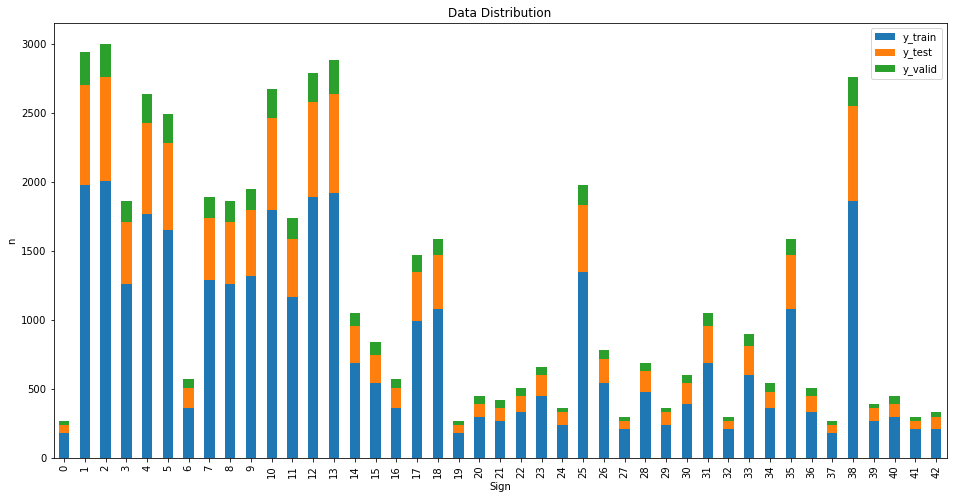

In [8]:
### Plot the distribution to gain a better understanding of which sign types are represented 
### more than others.
### This may lead to better or worse classification results.
ax = label_information.plot.bar(figsize=(16,8),stacked=True, title='Data Distribution')
ax.set(xlabel="Sign", ylabel="n")
plt.savefig('./example_images/writeup3.png',bbox_inches='tight')

In [9]:
# Look at a description of the data, especially min and max in the training data
label_information.describe()

,y_train,y_test,y_valid
count,43.000000,43.000000,43.000000
mean,809.279070,293.720930,102.558140
std,626.750855,233.442389,69.662213
min,180.000000,60.000000,30.000000
25%,285.000000,90.000000,60.000000
50%,540.000000,180.000000,60.000000
75%,1275.000000,450.000000,150.000000
max,2010.000000,750.000000,240.000000


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [10]:
# Import cv2 for preprocessing
import cv2

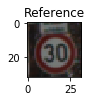

In [11]:
# Pick image to show all transformationns
plt.figure(figsize=(1,1))
plt.imshow(X_train[3562])
plt.title('Reference')
plt.savefig('./example_images/writeup4.png',bbox_inches='tight')

In [12]:
# Use a simple average for grayscaling 
#(Could use built in grayscaling function form CV2 later on)

X_train = np.average(X_train, axis=3).astype(np.uint8).reshape(34799, 32, 32,1)
X_test = np.average(X_test, axis=3).astype(np.uint8).reshape(12630, 32, 32,1)
X_valid = np.average(X_valid, axis=3).astype(np.uint8).reshape(4410, 32, 32,1)

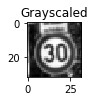

In [13]:
# image after grayscaling
plt.figure(figsize=(1,1))
plt.imshow(X_train[3562].reshape(32,32), cmap="gray")
plt.title('Grayscaled')
plt.savefig('./example_images/writeup4a.png',bbox_inches='tight')

In [14]:
# Histogram equalized image from grayscale

X_train = np.array([cv2.equalizeHist(x) for x in X_train]).reshape(34799, 32, 32,1)
X_test = np.array([cv2.equalizeHist(x) for x in X_test]).reshape(12630, 32, 32,1)
X_valid = np.array([cv2.equalizeHist(x) for x in X_valid]).reshape(4410, 32, 32,1)

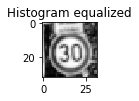

In [15]:
# Image after equalization
plt.figure(figsize=(1,1))
plt.imshow(X_train[3562].reshape(32,32), cmap="gray")
plt.title('Histogram equalized')
plt.savefig('./example_images/writeup5.png',bbox_inches='tight')

In [16]:
# Make function to approx. normalize image data using (pixel-128)/128
def approxNormalize(array):
    return (array.astype(float)-128)/128

# Apply function to all image data
X_train = approxNormalize(X_train)
X_test = approxNormalize(X_test)
X_valid = approxNormalize(X_valid)

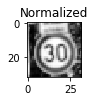

In [17]:
# Image after normalization
plt.figure(figsize=(1,1))
plt.imshow(X_train[3562].reshape(32,32), cmap="gray")
plt.title('Normalized')
plt.savefig('./example_images/writeup6.png',bbox_inches='tight')

In [18]:
# Make function to add noise to an image
import random
def add_gauss_noise(img):
    row,col,ch= img.shape
    mean = 0
    gauss = np.random.normal(mean,np.random.choice([x*0.1 for x in range(1,4)]),(row,col,ch))
    gauss = gauss.reshape(row,col,ch)
    noisy = img.reshape(32,32,1) + gauss
    return noisy

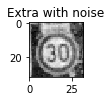

In [19]:
# Image with noise
test_gauss_noise = add_gauss_noise(X_train[3562])
plt.figure(figsize=(1,1))
plt.imshow(test_gauss_noise.reshape(32,32), cmap="gray")
plt.title('Extra with noise')
plt.savefig('./example_images/writeup7.png',bbox_inches='tight')

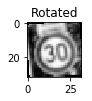

In [20]:
# Make function to add random rotation from -10 to 10 degrees to image
from scipy.misc import imrotate
def random_rotate(img):
    rotated = imrotate(img.reshape(32,32),random.randint(-8, 8)) #,interp='nearest'
    return rotated.reshape(32,32,1)

# Image with rotation
test_rotate = random_rotate(X_train[3562])
plt.figure(figsize=(1,1))
plt.imshow(test_rotate.reshape(32,32), cmap="gray")
plt.title('Rotated')
plt.savefig('./example_images/writeup8.png',bbox_inches='tight')

The Following code cells can be used to generate additional augemnted images. I used this during development but got to the conlusion, that it did not improve the overall performance. It'd kept in thr code for reference.

### Model Architecture

In [21]:
# The basic model architecture is adapted from LeNet
# Hyperparameters were changed and dropout for the two fully connected layers was introduced

import tensorflow as tf

EPOCHS = 100 # 30 # 50 # 30
BATCH_SIZE = 64 # 128 # 256

# Experimenting with lower and higher keep rates. For maximum generalization, 
# 0.5 is choosen for the implementation
dropout = 0.50 #0.75  # Dropout, probability to keep units

In [22]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the 
    # weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    l1 = tf.nn.conv2d(x, conv1_W, strides=[1,1,1,1], padding='VALID') + conv1_b

    # l1 Activation.
    l1 = tf.nn.relu(l1)

    # p1 Pooling. Input = 28x28x6. Output = 14x14x6.
    p1 = tf.nn.max_pool(l1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5,5,6,16), mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    l2 = tf.nn.conv2d(p1, conv2_W, strides=[1,1,1,1], padding='VALID') + conv2_b
    
    # l2 Activation.
    l2 = tf.nn.relu(l2)

    # p2 Pooling. Input = 10x10x16. Output = 5x5x16.
    p2 = tf.nn.max_pool(l2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(p2)
       
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400,120), mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.add(tf.matmul(fc0,fc1_W),fc1_b)
    
    # fc2 fc1 Activation.
    fc1 = tf.nn.relu(fc1)
    
    # dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120,84),mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.add(tf.matmul(fc1,fc2_W),fc2_b)
    
    # fc2 Activation.
    fc2 = tf.nn.relu(fc2)
    
    # fc2 dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    out_W = tf.Variable(tf.truncated_normal(shape=(84,43), mean=mu, stddev=sigma))
    out_b = tf.Variable(tf.zeros(43))
    logits = tf.add(tf.matmul(fc2,out_W),out_b)
    
    # Returning l1 and l2 for later exploration (see Step 4)
    return logits,l1,l2

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [23]:
# Define variables
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)

In [24]:
# Learning rate
rate = 0.001 #

logits,l1,l2 = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [25]:
# Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
predict_operation = tf.argmax(logits, 1)
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [26]:
# Prediction
def predict_nn(X_data):
    num_examples = len(X_data)
    sess = tf.get_default_session()
    results = []
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x = X_data[offset:offset+BATCH_SIZE]
        result = sess.run(predict_operation, feed_dict={x: batch_x, keep_prob: 1.})
        results.append(result)
    return results

In [27]:
#Visualization of the training
def visualize_training_process(name,x_epoch_list,y_training_accuracy,y_validation_accuracy):
    fig = plt.figure(figsize=(12,8))
    a = fig.add_subplot(1,1,1)

    a.plot(x_epoch_list,y_training_accuracy, color="b", label="Training accuracy")
    a.plot(x_epoch_list,y_validation_accuracy, color="r", label="Validation accuracy")
    a.set_title("Covnet Training Process\n"+name+"\n")
    a.set_xlabel("Epoch")
    a.legend()
    a.yaxis.grid(color='gray', linestyle='dashed')
    a.xaxis.grid(color='gray', linestyle='dashed')

    a.plot()

    plt.savefig('./example_images/writeup9.png',bbox_inches='tight')

In [28]:
# Training
from sklearn.utils import shuffle
from tqdm import tqdm

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    # Make lists for later analysis of training
    x_epoch_list=[]
    y_validation_accuracy=[]
    y_training_accuracy=[]
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in tqdm(range(0, num_examples, BATCH_SIZE)):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: dropout})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        train_accuracy = evaluate(X_train, y_train)
        
        x_epoch_list.append(i)
        y_validation_accuracy.append(validation_accuracy)
        y_training_accuracy.append(train_accuracy)
        
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Train Accuracy = {:.3f}".format(train_accuracy))
        print()
        
    current_model_name = 'lenet_e{}_d{:2.0f}_avalid0{:3.0f}'.format(EPOCHS,dropout*100,validation_accuracy*1000)
    
    saver.save(sess, './'+current_model_name)
    print("Model saved as: "+current_model_name)

Training...



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:21<00:00, 25.48it/s]


EPOCH 1 ...
Validation Accuracy = 0.758
Train Accuracy = 0.765



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:19<00:00, 27.69it/s]


EPOCH 2 ...
Validation Accuracy = 0.860
Train Accuracy = 0.894



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 27.07it/s]


EPOCH 3 ...
Validation Accuracy = 0.866
Train Accuracy = 0.918



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:19<00:00, 27.74it/s]


EPOCH 4 ...
Validation Accuracy = 0.898
Train Accuracy = 0.947



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:19<00:00, 27.52it/s]


EPOCH 5 ...
Validation Accuracy = 0.922
Train Accuracy = 0.964



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:19<00:00, 27.83it/s]


EPOCH 6 ...
Validation Accuracy = 0.928
Train Accuracy = 0.969



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:19<00:00, 27.81it/s]


EPOCH 7 ...
Validation Accuracy = 0.941
Train Accuracy = 0.975



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:19<00:00, 27.44it/s]


EPOCH 8 ...
Validation Accuracy = 0.937
Train Accuracy = 0.980



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:19<00:00, 27.35it/s]


EPOCH 9 ...
Validation Accuracy = 0.942
Train Accuracy = 0.981



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 27.13it/s]


EPOCH 10 ...
Validation Accuracy = 0.946
Train Accuracy = 0.987



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:19<00:00, 27.61it/s]


EPOCH 11 ...
Validation Accuracy = 0.953
Train Accuracy = 0.988



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.94it/s]


EPOCH 12 ...
Validation Accuracy = 0.955
Train Accuracy = 0.989



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:19<00:00, 27.35it/s]


EPOCH 13 ...
Validation Accuracy = 0.950
Train Accuracy = 0.988



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:19<00:00, 27.26it/s]


EPOCH 14 ...
Validation Accuracy = 0.951
Train Accuracy = 0.991



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 27.63it/s]


EPOCH 15 ...
Validation Accuracy = 0.951
Train Accuracy = 0.992



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 27.02it/s]


EPOCH 16 ...
Validation Accuracy = 0.952
Train Accuracy = 0.991



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:19<00:00, 27.30it/s]


EPOCH 17 ...
Validation Accuracy = 0.961
Train Accuracy = 0.992



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.59it/s]


EPOCH 18 ...
Validation Accuracy = 0.959
Train Accuracy = 0.994



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.02it/s]


EPOCH 19 ...
Validation Accuracy = 0.959
Train Accuracy = 0.994



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.60it/s]


EPOCH 20 ...
Validation Accuracy = 0.954
Train Accuracy = 0.994



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.92it/s]


EPOCH 21 ...
Validation Accuracy = 0.962
Train Accuracy = 0.996



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.79it/s]


EPOCH 22 ...
Validation Accuracy = 0.958
Train Accuracy = 0.996



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 27.08it/s]


EPOCH 23 ...
Validation Accuracy = 0.961
Train Accuracy = 0.996



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.94it/s]


EPOCH 24 ...
Validation Accuracy = 0.963
Train Accuracy = 0.997



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.75it/s]


EPOCH 25 ...
Validation Accuracy = 0.962
Train Accuracy = 0.997



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.77it/s]


EPOCH 26 ...
Validation Accuracy = 0.964
Train Accuracy = 0.997



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 25.91it/s]


EPOCH 27 ...
Validation Accuracy = 0.958
Train Accuracy = 0.997



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.12it/s]


EPOCH 28 ...
Validation Accuracy = 0.962
Train Accuracy = 0.997



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:21<00:00, 25.71it/s]


EPOCH 29 ...
Validation Accuracy = 0.961
Train Accuracy = 0.998



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:24<00:00, 17.74it/s]


EPOCH 30 ...
Validation Accuracy = 0.961
Train Accuracy = 0.997



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.83it/s]


EPOCH 31 ...
Validation Accuracy = 0.968
Train Accuracy = 0.998



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 25.95it/s]


EPOCH 32 ...
Validation Accuracy = 0.963
Train Accuracy = 0.997



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:23<00:00, 23.19it/s]


EPOCH 33 ...
Validation Accuracy = 0.969
Train Accuracy = 0.998



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:24<00:00, 22.11it/s]


EPOCH 34 ...
Validation Accuracy = 0.960
Train Accuracy = 0.997



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:21<00:00, 25.50it/s]


EPOCH 35 ...
Validation Accuracy = 0.966
Train Accuracy = 0.998



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:21<00:00, 25.27it/s]


EPOCH 36 ...
Validation Accuracy = 0.971
Train Accuracy = 0.998



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:21<00:00, 25.86it/s]


EPOCH 37 ...
Validation Accuracy = 0.970
Train Accuracy = 0.998



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:25<00:00, 21.43it/s]


EPOCH 38 ...
Validation Accuracy = 0.967
Train Accuracy = 0.998



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:22<00:00, 24.49it/s]


EPOCH 39 ...
Validation Accuracy = 0.962
Train Accuracy = 0.997



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:22<00:00, 24.62it/s]


EPOCH 40 ...
Validation Accuracy = 0.962
Train Accuracy = 0.999



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:26<00:00, 24.56it/s]


EPOCH 41 ...
Validation Accuracy = 0.965
Train Accuracy = 0.999



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:24<00:00, 23.98it/s]


EPOCH 42 ...
Validation Accuracy = 0.969
Train Accuracy = 0.998



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:26<00:00, 20.85it/s]


EPOCH 43 ...
Validation Accuracy = 0.973
Train Accuracy = 0.999



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:23<00:00, 23.29it/s]


EPOCH 44 ...
Validation Accuracy = 0.969
Train Accuracy = 0.998



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:21<00:00, 25.57it/s]


EPOCH 45 ...
Validation Accuracy = 0.969
Train Accuracy = 0.999



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:21<00:00, 24.86it/s]


EPOCH 46 ...
Validation Accuracy = 0.967
Train Accuracy = 0.998



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:21<00:00, 27.67it/s]


EPOCH 47 ...
Validation Accuracy = 0.970
Train Accuracy = 0.999



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:22<00:00, 23.97it/s]


EPOCH 48 ...
Validation Accuracy = 0.971
Train Accuracy = 0.999



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.50it/s]


EPOCH 49 ...
Validation Accuracy = 0.962
Train Accuracy = 0.998



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:21<00:00, 25.33it/s]


EPOCH 50 ...
Validation Accuracy = 0.970
Train Accuracy = 0.999



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:21<00:00, 25.47it/s]


EPOCH 51 ...
Validation Accuracy = 0.968
Train Accuracy = 0.999



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:23<00:00, 22.84it/s]


EPOCH 52 ...
Validation Accuracy = 0.971
Train Accuracy = 0.999



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.67it/s]


EPOCH 53 ...
Validation Accuracy = 0.959
Train Accuracy = 0.998



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.37it/s]


EPOCH 54 ...
Validation Accuracy = 0.966
Train Accuracy = 1.000



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.49it/s]


EPOCH 55 ...
Validation Accuracy = 0.966
Train Accuracy = 0.999



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:21<00:00, 25.83it/s]


EPOCH 56 ...
Validation Accuracy = 0.966
Train Accuracy = 0.999



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.60it/s]


EPOCH 57 ...
Validation Accuracy = 0.971
Train Accuracy = 0.999



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:21<00:00, 25.66it/s]


EPOCH 58 ...
Validation Accuracy = 0.964
Train Accuracy = 0.999



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.17it/s]


EPOCH 59 ...
Validation Accuracy = 0.970
Train Accuracy = 0.999



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:21<00:00, 25.27it/s]


EPOCH 60 ...
Validation Accuracy = 0.968
Train Accuracy = 0.999



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.47it/s]


EPOCH 61 ...
Validation Accuracy = 0.970
Train Accuracy = 0.999



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 27.17it/s]


EPOCH 62 ...
Validation Accuracy = 0.973
Train Accuracy = 0.999



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.40it/s]


EPOCH 63 ...
Validation Accuracy = 0.965
Train Accuracy = 0.998



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:21<00:00, 25.29it/s]


EPOCH 64 ...
Validation Accuracy = 0.971
Train Accuracy = 0.999



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.26it/s]


EPOCH 65 ...
Validation Accuracy = 0.975
Train Accuracy = 0.999



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.64it/s]


EPOCH 66 ...
Validation Accuracy = 0.970
Train Accuracy = 0.998



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.68it/s]


EPOCH 67 ...
Validation Accuracy = 0.971
Train Accuracy = 0.999



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.85it/s]


EPOCH 68 ...
Validation Accuracy = 0.970
Train Accuracy = 1.000



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.72it/s]


EPOCH 69 ...
Validation Accuracy = 0.973
Train Accuracy = 0.999



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.64it/s]


EPOCH 70 ...
Validation Accuracy = 0.973
Train Accuracy = 0.999



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.18it/s]


EPOCH 71 ...
Validation Accuracy = 0.973
Train Accuracy = 1.000



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.58it/s]


EPOCH 72 ...
Validation Accuracy = 0.968
Train Accuracy = 0.999



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.26it/s]


EPOCH 73 ...
Validation Accuracy = 0.971
Train Accuracy = 0.999



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.30it/s]


EPOCH 74 ...
Validation Accuracy = 0.970
Train Accuracy = 0.999



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.28it/s]


EPOCH 75 ...
Validation Accuracy = 0.973
Train Accuracy = 1.000



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.17it/s]


EPOCH 76 ...
Validation Accuracy = 0.971
Train Accuracy = 1.000



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.24it/s]


EPOCH 77 ...
Validation Accuracy = 0.974
Train Accuracy = 0.999



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.45it/s]


EPOCH 78 ...
Validation Accuracy = 0.975
Train Accuracy = 0.999



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:21<00:00, 25.87it/s]


EPOCH 79 ...
Validation Accuracy = 0.972
Train Accuracy = 0.999



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.15it/s]


EPOCH 80 ...
Validation Accuracy = 0.971
Train Accuracy = 0.999



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.42it/s]


EPOCH 81 ...
Validation Accuracy = 0.973
Train Accuracy = 1.000



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:21<00:00, 25.47it/s]


EPOCH 82 ...
Validation Accuracy = 0.975
Train Accuracy = 1.000



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.12it/s]


EPOCH 83 ...
Validation Accuracy = 0.971
Train Accuracy = 0.998



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.18it/s]


EPOCH 84 ...
Validation Accuracy = 0.973
Train Accuracy = 0.999



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 25.99it/s]


EPOCH 85 ...
Validation Accuracy = 0.970
Train Accuracy = 0.999



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.25it/s]


EPOCH 86 ...
Validation Accuracy = 0.968
Train Accuracy = 0.999



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.46it/s]


EPOCH 87 ...
Validation Accuracy = 0.969
Train Accuracy = 0.999



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.20it/s]


EPOCH 88 ...
Validation Accuracy = 0.973
Train Accuracy = 1.000



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.38it/s]


EPOCH 89 ...
Validation Accuracy = 0.974
Train Accuracy = 1.000



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.26it/s]


EPOCH 90 ...
Validation Accuracy = 0.968
Train Accuracy = 0.999



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.22it/s]


EPOCH 91 ...
Validation Accuracy = 0.977
Train Accuracy = 1.000



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:21<00:00, 25.73it/s]


EPOCH 92 ...
Validation Accuracy = 0.974
Train Accuracy = 0.999



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:21<00:00, 25.68it/s]


EPOCH 93 ...
Validation Accuracy = 0.970
Train Accuracy = 0.998



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.06it/s]


EPOCH 94 ...
Validation Accuracy = 0.971
Train Accuracy = 0.999



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.34it/s]


EPOCH 95 ...
Validation Accuracy = 0.973
Train Accuracy = 0.999



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.41it/s]


EPOCH 96 ...
Validation Accuracy = 0.971
Train Accuracy = 0.999



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.72it/s]


EPOCH 97 ...
Validation Accuracy = 0.970
Train Accuracy = 0.999



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.44it/s]


EPOCH 98 ...
Validation Accuracy = 0.971
Train Accuracy = 0.999



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.51it/s]


EPOCH 99 ...
Validation Accuracy = 0.974
Train Accuracy = 1.000



100%|████████████████████████████████████████████████████████████████████████████████| 544/544 [00:20<00:00, 26.30it/s]


EPOCH 100 ...
Validation Accuracy = 0.974
Train Accuracy = 1.000

Model saved as: lenet_e100_d50_avalid0974


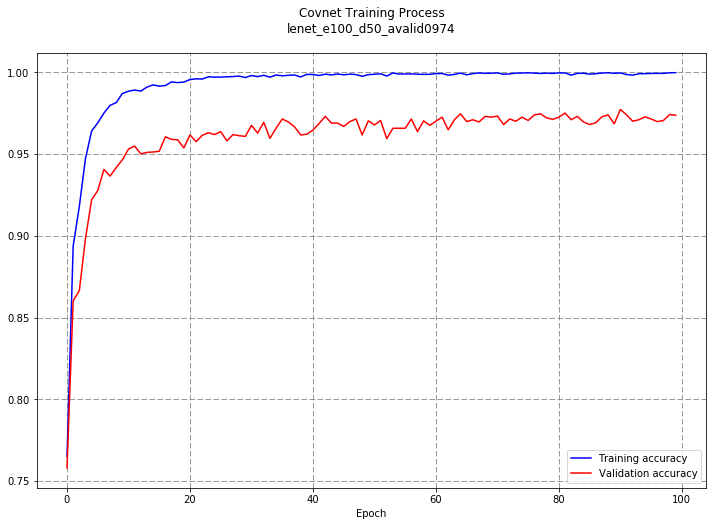

In [29]:
# Plot the training process
visualize_training_process(current_model_name,x_epoch_list,
                           y_training_accuracy,y_validation_accuracy)

In [30]:
# Test against test data
with tf.Session() as sess:
    saver.restore(sess, './'+current_model_name)
    
    num_examples = len(X_test)
    
    print("Testing model '"+current_model_name+"' with test data:")
    print()

    accuracy = evaluate(X_test, y_test)
    
    print('Accuracy = '+str(accuracy))
    print()

INFO:tensorflow:Restoring parameters from ./lenet_e100_d50_avalid0974
Testing model 'lenet_e100_d50_avalid0974' with test data:

Accuracy = 0.947426761669



---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

Instead of downloading 5 images, I went outside and took my own pictures.
I live in Germany, therefore all street signs match the training data.
However, since the training data does not include all german street signs,
I only took pictures of those included in the training data.

All images were taken with my OnePlus3 phone, with dimensions of 3488 x 3488.
Locations: East Berlin and Nuremberg Airport
Conditions: Sunny weather 
Date and time: June 2017, afternoon

In [31]:
# Make all necessary inputs
import os
import matplotlib.image as mpimg
from scipy.misc import imresize

# Make list of all testimages 
testimagelist = [os.path.join("Photos_real_world/"+os.listdir("Photos_real_world/")[i]) 
                 for i in range(len(os.listdir("Photos_real_world/")))]

In [32]:
# Read the pictures
X_new_real_world = np.array([mpimg.imread(x) for x in testimagelist])

# Resizes the pictures down to 32x32 to fit the net
X_new_real_world = np.array([imresize(x,(32,32,3)) for x in X_new_real_world])

# Add the correct y labels to test for accuracy
y_new_real_world = np.array([13,12,38,38,25,17,35,13,17,3,34,36,12,15,22,33,13,2,26,22,22,15,15,17,17,33,13,12,28,
                            17,27,17,17,33,17,15,25,17,34,13,14,34,14,34,17,14,34,35,27,13,33,29,18,38,33,13,37,13,37,17,13,36,13])

In [33]:
# Look at the shape and verify that everything is ready to go
print("Shape Images:")
print(X_new_real_world.shape)
print()
print("Shape Labels:")
print(y_new_real_world.shape)

Shape Images:
(63, 32, 32, 3)

Shape Labels:
(63,)


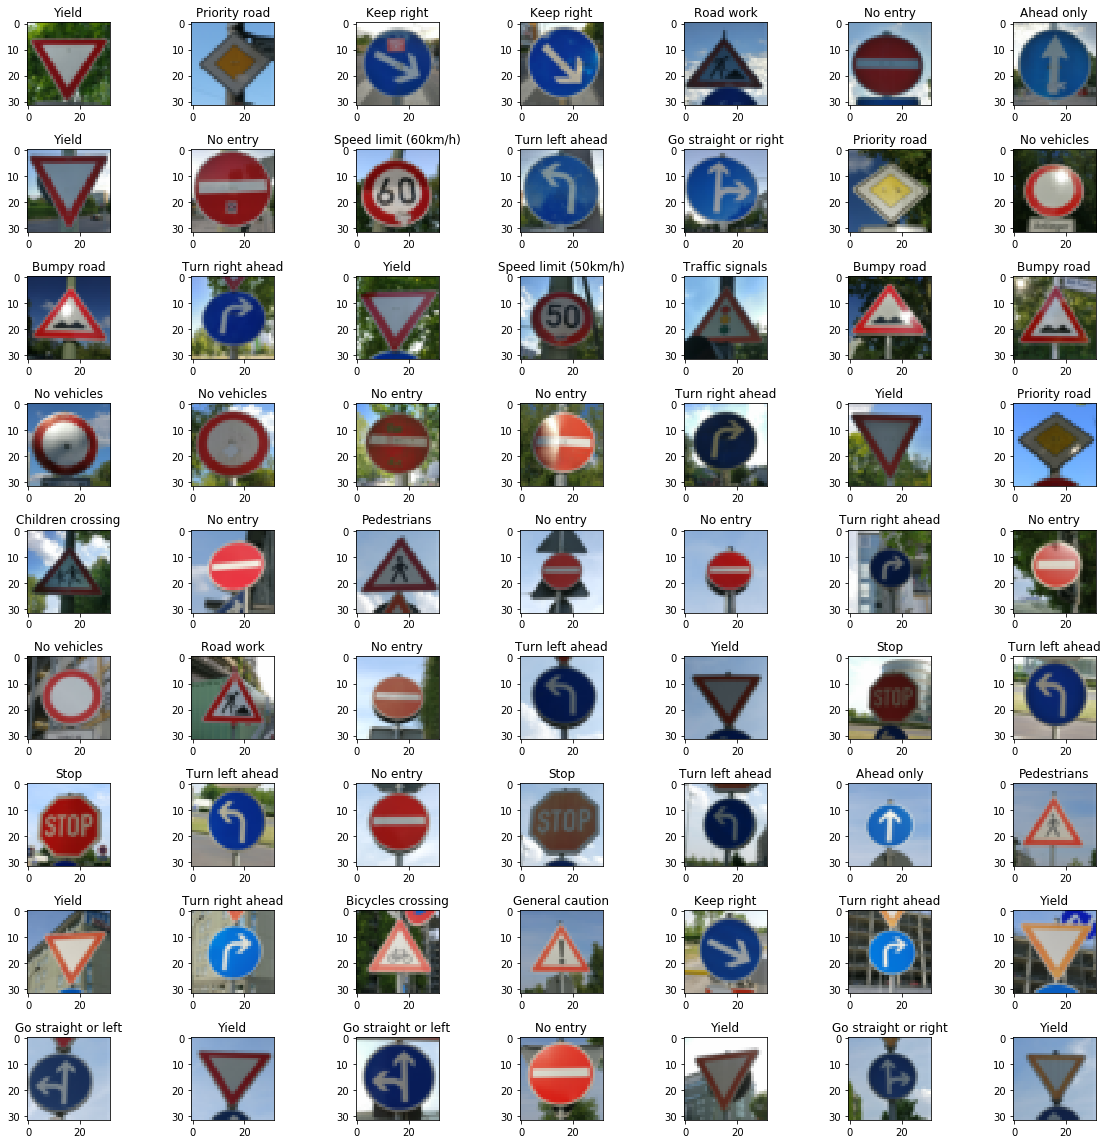

In [34]:
# Plot all images with labels
plt.figure(figsize=(16,16))

count = 0
pos0 = 0
pos1 = 0

for image in X_new_real_world:
    name = "a"+str(count)
    name = plt.subplot2grid((int(np.ceil(X_new_real_world.shape[0]/7)),7),(pos0,pos1),rowspan=1,colspan=1)
    name.set_title(signnames_dict['SignName'][y_new_real_world[count]])
    name.imshow(image)
    
    count +=1
    pos1+=1
    
    if pos1==7:
        pos0+=1
        pos1=0


plt.tight_layout()
plt.savefig('./example_images/writeup10.png',bbox_inches='tight')

### Predict the Sign Type for Each Image

In [35]:
# Preprocess the images the same way the training data was processed
X_new_data = np.average(X_new_real_world, axis=3).astype(np.uint8).reshape(len(X_new_real_world), 32, 32,1)
X_new_data = np.array([cv2.equalizeHist(x) for x in X_new_data]).reshape(len(X_new_real_world), 32, 32,1)

def approxNormalize(array):
    return (array.astype(float)-128)/128

X_new_data = approxNormalize(X_new_data)

In [36]:
# Make predictions
with tf.Session() as sess:
    saver.restore(sess, './'+current_model_name) #lenet_e25_d50_avalid0951 amazing 81%
    
    num_examples = len(X_new_data)
    
    print("Predicting...")
    print()

    prediction = predict_nn(X_new_data)
    accuracy = evaluate(X_new_data, y_new_real_world)
    
    print('Accuracy = '+str(accuracy))

INFO:tensorflow:Restoring parameters from ./lenet_e100_d50_avalid0974
Predicting...

Accuracy = 0.809523820877


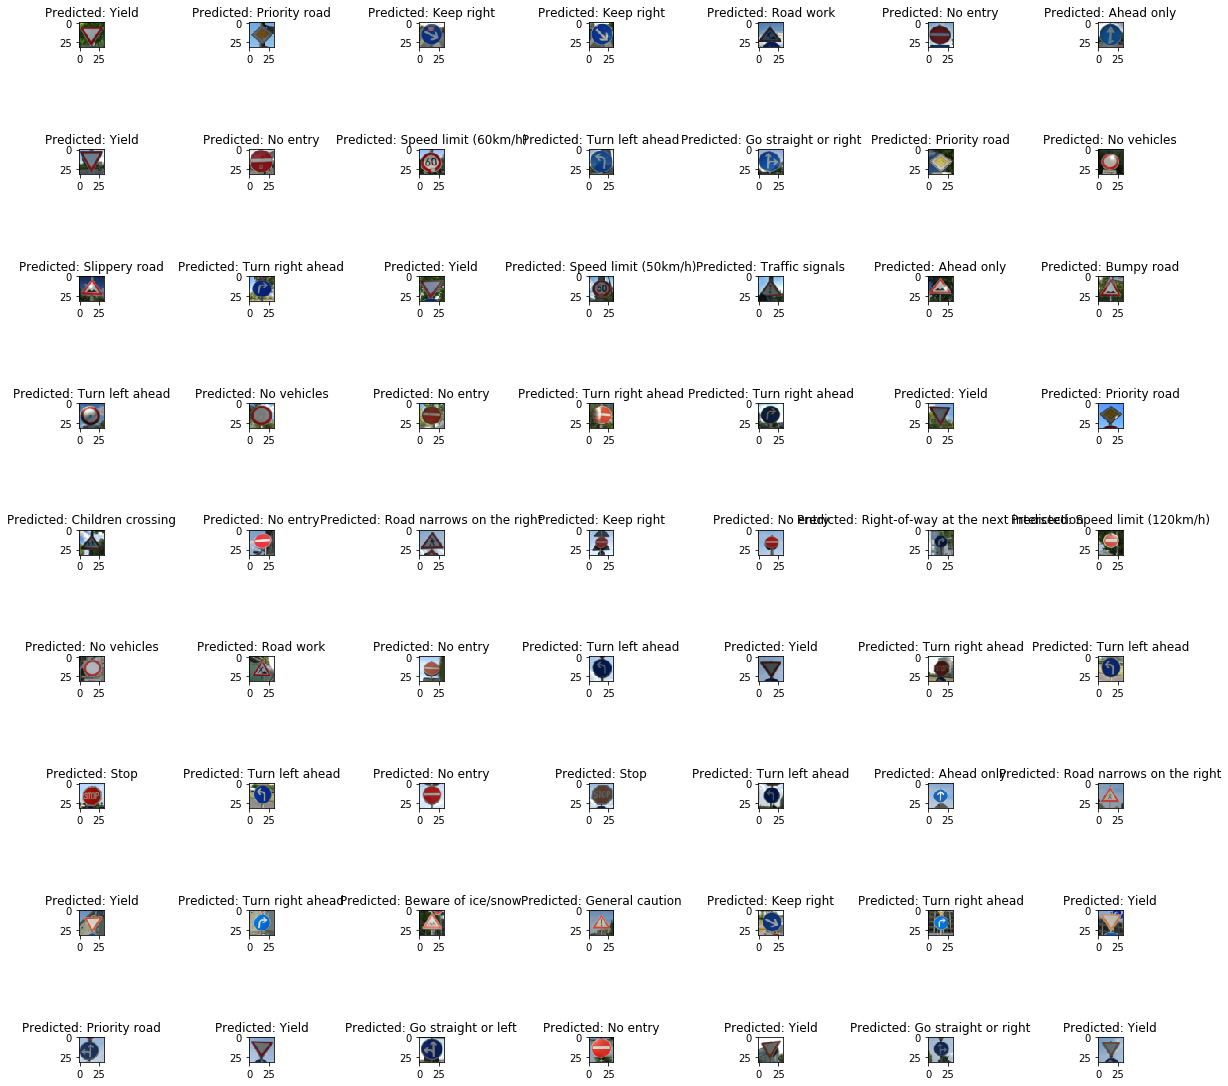

In [37]:
# Plot the original images now with the predictions
plt.figure(figsize=(16,16))

count = 0
pos0 = 0
pos1 = 0

for image in X_new_real_world:
    name = "a"+str(count)
    name = plt.subplot2grid((int(np.ceil(X_new_real_world.shape[0]/7)),7),(pos0,pos1),rowspan=1,colspan=1)
    name.set_title("Predicted: "+signnames_dict['SignName'][prediction[0][count]])
    name.imshow(image)
    
    count +=1
    pos1+=1
    
    if pos1==7:
        pos0+=1
        pos1=0


plt.tight_layout()
plt.savefig('./example_images/writeup11.png',bbox_inches='tight')

### Analyze Performance

In [38]:
print("Accuracy: {:2.2f}".format(accuracy*100))

Accuracy: 80.95


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [39]:
# Define function for top 5 softmax values per prediction
def top_5_softmax(X_data):
    num_examples = len(X_data)
    sess = tf.get_default_session()
    results = []
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x = X_data[offset:offset+BATCH_SIZE]
        result = sess.run(tf.nn.top_k(logits, k=5),feed_dict={x: batch_x, keep_prob: 1.})
        results.append(result)
    return results

In [40]:
# retrieve top 5 softmax values
with tf.Session() as sess:
    saver.restore(sess, './'+current_model_name)
    
    num_examples = len(X_new_data)
    
    print("predicting...")
    print()
    
    top_5_softmax = top_5_softmax(X_new_data)
        
    print('Done')

INFO:tensorflow:Restoring parameters from ./lenet_e100_d50_avalid0974
predicting...

Done


In [41]:
# Display all top 5 softmax values
top_5_softmax

[TopKV2(values=array([[  6.70978699e+01,  -4.05488396e+00,  -9.75914669e+00,
         -1.64740143e+01,  -2.67174015e+01],
       [  3.19028931e+01,  -1.66783180e+01,  -2.13049850e+01,
         -2.14131374e+01,  -2.59897671e+01],
       [  5.76671028e+01,  -3.26058655e+01,  -3.98064919e+01,
         -4.24942055e+01,  -4.28802986e+01],
       [  8.40513077e+01,  -3.98242607e+01,  -4.62246170e+01,
         -4.73281746e+01,  -5.71903572e+01],
       [  1.32338476e+01,  -8.29649830e+00,  -9.65561390e+00,
         -1.00167208e+01,  -1.02505836e+01],
       [  1.92308750e+01,  -2.94673491e+00,  -3.98958731e+00,
         -4.52675772e+00,  -4.93450737e+00],
       [  2.31921120e+01,  -5.36288500e+00,  -7.16274023e+00,
         -7.54399061e+00,  -9.45892143e+00],
       [  6.12317963e+01,  -5.74021578e+00,  -1.33287945e+01,
         -1.38592815e+01,  -1.93781796e+01],
       [  1.33803596e+01,   3.71732211e+00,  -8.56055140e-01,
         -3.81385159e+00,  -4.42602444e+00],
       [  1.29589720e+

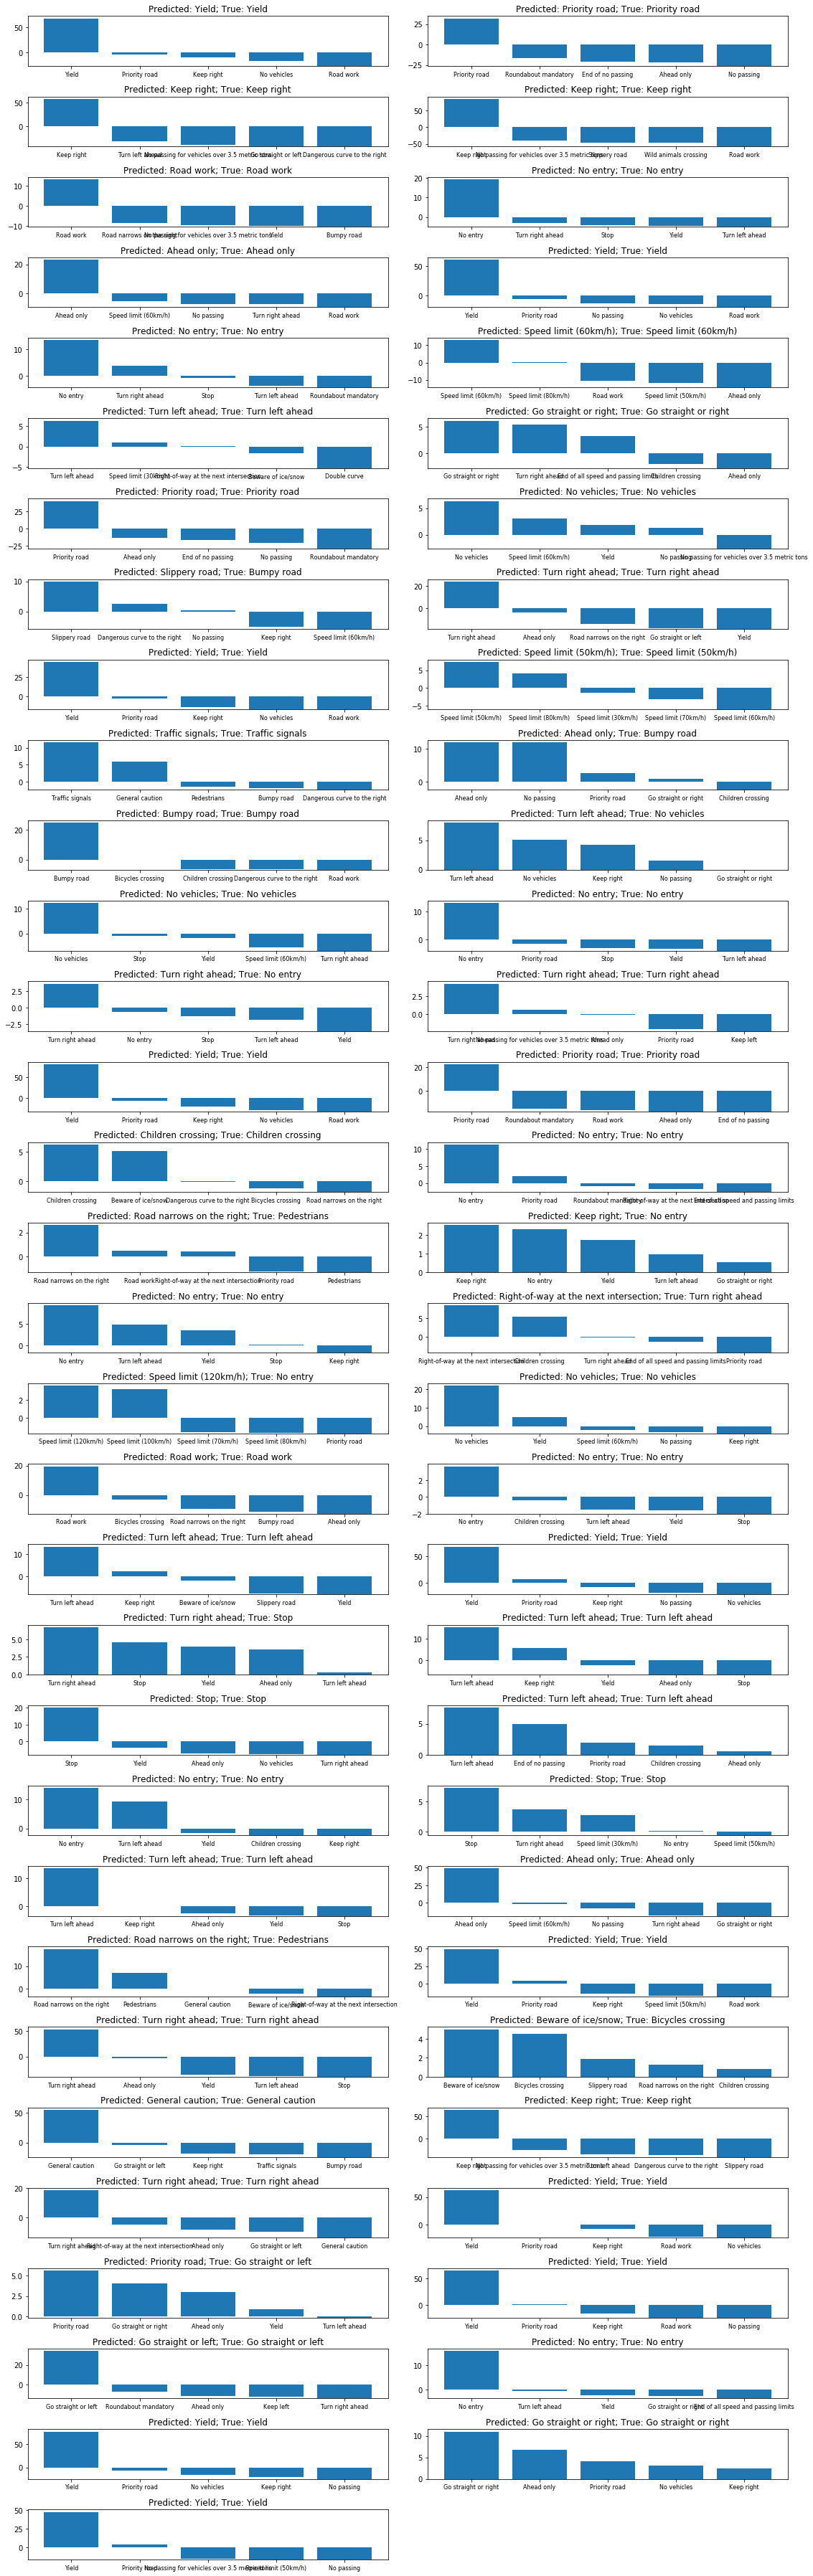

In [42]:
# To undersatdn the data more easily, plot the softmax data including labels and predictions

args_x = top_5_softmax[0][1]
args_y = top_5_softmax[0][0]

X_names=[]
for i in args_x:
    l = []
    for ii in i:
        l.append(signnames_dict['SignName'][ii])
        
    X_names.append(l)

plt.figure(figsize=(16,50))

count = 0
pos0 = 0
pos1 = 0

for y_vals,labels in zip(list(args_y),X_names):
    
    name = "a"+str(count)
    name = plt.subplot2grid((int(np.ceil(X_new_real_world.shape[0]/2)),2),(pos0,pos1),rowspan=1,colspan=1)
    name.set_title("Predicted: "+signnames_dict['SignName'][prediction[0][count]]+"; True: "+signnames_dict['SignName'][y_new_real_world[count]])
    name.set_xticks([i for i in range(1,6)])
    name.set_xticklabels(labels, rotation='horizontal', fontsize=8)
    name.bar([i for i in range(1,6)],y_vals)
    
    count +=1
    pos1+=1
    
    if pos1==2:
        pos0+=1
        pos1=0


plt.tight_layout()
plt.savefig('./example_images/writeup12.png',bbox_inches='tight')

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [43]:
### Visualization of network feature maps here.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1, name='out'):
    # image_input = is expected to be a preprocessed image, ready for scoring
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x: image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
        plt.savefig('./example_images/'+name+'.png',bbox_inches='tight')

INFO:tensorflow:Restoring parameters from ./lenet_e100_d50_avalid0974
Working...

Depicted are featuremaps for both conv layers (l1, l2):

Done

These are the visualized featuremaps for the first model:
(Sign picture used: Pedestrians)


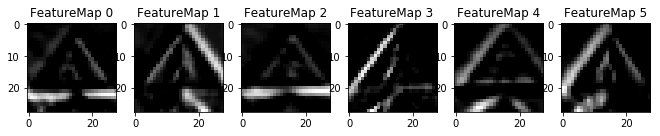

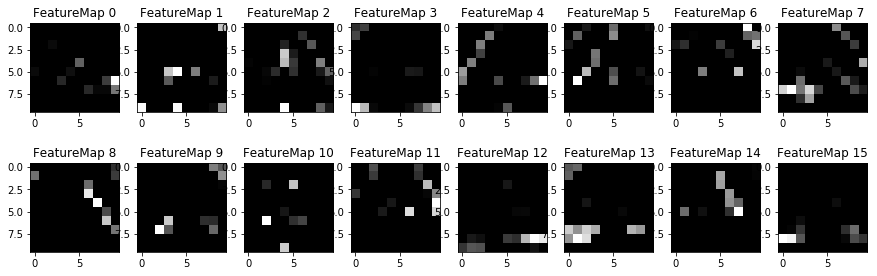

In [44]:
# Display the feature maps
with tf.Session() as sess:
    saver.restore(sess, './'+current_model_name)
    
    print("Working...")
    print()
    print("Depicted are featuremaps for both conv layers (l1, l2):")
    print()

    outputFeatureMap(X_new_data[30].reshape(1,32,32,1),l1, plt_num=2, name='trained_l1')
    outputFeatureMap(X_new_data[30].reshape(1,32,32,1),l2, name='trained_l2')
        
    print('Done')
    print()
    print('These are the visualized featuremaps for the first model:')
    print('(Sign picture used: '+signnames_dict['SignName'][y_new_real_world[30]]+')')

Working...

Depicted are featuremaps for both conv layers (l1, l2):

Done

These are the visualized featuremaps for an untrained net:
(Sign picture used: Pedestrians)


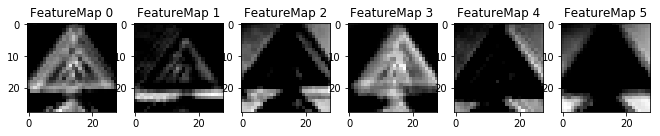

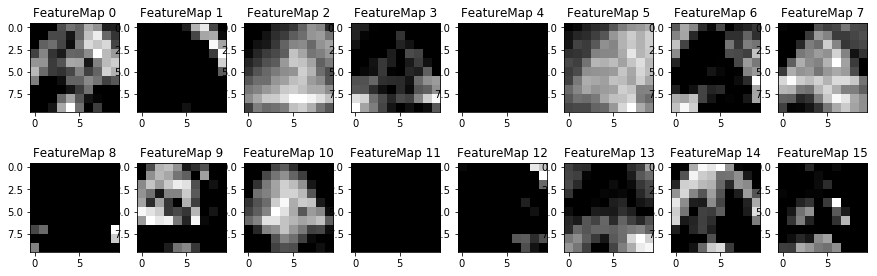

In [45]:
# Display the feature maps of untrained neural net
# Because the variable initialization takes random values, the output will look different every time
logits_u,l1_u,l2_u = LeNet(x)

with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    print("Working...")
    print()
    print("Depicted are featuremaps for both conv layers (l1, l2):")
    print()

    outputFeatureMap(X_new_data[30].reshape(1,32,32,1),l1_u, plt_num=2, name='untrained_l1')
    outputFeatureMap(X_new_data[30].reshape(1,32,32,1),l2_u, name='untrained_l2')
        
    print('Done')
    print()
    print('These are the visualized featuremaps for an untrained net:')
    print('(Sign picture used: '+signnames_dict['SignName'][y_new_real_world[30]]+')')